 <img src="../images/logos/Ideam_logo.png" width=300 alt="Ideam_Logo"></img> 

# Acceso a información hidrometeorológica en Colombia - Estaciones

---

## Resumen
En este cuadernillo (Notebook) aprenderemos:

1. Introduccion a la red de monitoreo del IDEAM
2. Cátalogo de estaciones de IDEAM
3. Consulta de datos usando la plataforma [datosabiertos.gov.co](https://www.datos.gov.co/) 
1. Consulta de datos de temperatura y precipitación
1. Otros datos disponibles

## Prerequisitos
| Conceptos | Importancia | Notas |
| --- | --- | --- |
| [Introducción a Pandas](https://foundations.projectpythia.org/core/pandas.html) | Necesario | lectura de datos tabulares |
| [Introducción a Xarray](https://foundations.projectpythia.org/core/xarray.html) | Necesario | lectura de datos multidimensionales |
| [Introducción a Datetime](https://foundations.projectpythia.org/core/datetime/datetime.html) | Necesario | Entender estampas de tiempo |
| [Introducción a Py-Art](https://projectpythia.org/radar-cookbook/README.html) | Necesario | lectura de datos de radar |
| [Introducción a Xradar](https://docs.openradarscience.org/projects/xradar/en/stable/notebooks/Read-plot-Sigmet-data-from-AWS.html) | Necesario | lectura de datos de radar |
| [Introducción a  NetCDF](https://foundations.projectpythia.org/core/data-formats/netcdf-cf.html) | Útil | Entender la metadata de los datos |

- **Tiempo de aprendizaje**: 30 minutos

# 1. Catalogo nacional de estaciones de IDEAM 

El ideam cuenta con .....

## Librerias


In [1]:
import pandas as pd
# import folium
import cartopy.crs as ccrs
import cartopy.feature as feature
import matplotlib.pyplot as plt

## Acceso al catalog en [datosabiertos.gov.co](https://www.datos.gov.co/) 

El catalogo nacional de estaciones de IDEAM se encuentra disponible en el siguiente link. Podemos leer el cat[alogo usando `pandas`

In [2]:
df_cat = pd.read_excel('http://bart.ideam.gov.co/cneideam/CNE_IDEAM.xls')

In [3]:
df_cat.head()

OBJECTID    CODIGO                          nombre            CATEGORIA  \
0         1  44135030   CHIRIBIQUETE - AUT [44135030]  Climática Principal   
1         2  52055150  CERRO PARAMO  - AUT [52055150]  Climática Principal   
2         3  52055220     EL PARAISO - AUT [52055220]  Climática Principal   
3         4  44037040     EL ROSARIO - AUT [44037040]         Limnigráfica   
4         5  52077020     LOS NORTES - AUT [52077020]         Limnigráfica   

                  TECNOLOGIA            ESTADO FECHA_INSTALACION  altitud  \
0  Automática con Telemetría        Suspendida        2006-02-04      256   
1  Automática con Telemetría  En Mantenimiento        2005-12-09     3585   
2                    TEST005  En Mantenimiento        2004-03-01     3120   
3                    TEST005  En Mantenimiento        1964-08-15      600   
4                    TEST005            Activa        1984-09-15      340   

    latitud   longitud  ...            MUNICIPIO  \
0 -0.074167 -72.451389  ...               Solano   
1  0.843111 -77.388806  ...              Puerres   
2  1.070611 -77.636889  ...            Túquerres   
3  1.725250 -75.666389  ...  Florencia (Caquetá)   
4  1.741111 -77.531111  ...            Cumbitara   

                        AREA_OPERATIVA AREA_HIDROGRAFICA ZONA_HIDROGRAFICA  \
0    Area Operativa 04 - Huila-Caquetá          Amazonas              Yarí   
1  Area Operativa 07 - Nariño-Putumayo          Pacifico             Patía   
2  Area Operativa 07 - Nariño-Putumayo          Pacifico             Patía   
3    Area Operativa 04 - Huila-Caquetá          Amazonas           Caquetá   
4  Area Operativa 07 - Nariño-Putumayo          Pacifico             Patía   

                                         observacion CORRIENTE  \
0                                                NaN  Amazonas   
1  Cambio de tecnología por instalación o repoten...         0   
2                                                NaN         0   
3  Actualizada Tecnología y Tipo de Transmisión p...    CarañO   
4                                                NaN     Patia   

  FECHA_SUSPENSION SUBZONA_HIDROGRAFICA  \
0       2011-07-29            Río Mesay   
1              NaT         Río Guáitara   
2              NaT         Río Guáitara   
3              NaT        Río Orteguaza   
4              NaT      Río Patia Medio   

                                             ENTIDAD  \
0  INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...   
1  INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...   
2  INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...   
3  INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...   
4  INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...   

                                              subred  
0                                                NaN  
1          Radiación Ultravioleta,Radiación Visible,  
2  Altiplano Nariñense-Pacifico,Radiación Ultravi...  
3                                                NaN  
4  Altiplano Nariñense-Pacifico,RED ALERTAS - ARE...  

[5 rows x 21 columns]

In [4]:
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4497 entries, 0 to 4496
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   OBJECTID              4497 non-null   int64         
 1   CODIGO                4497 non-null   int64         
 2   nombre                4497 non-null   object        
 3   CATEGORIA             4497 non-null   object        
 4   TECNOLOGIA            4497 non-null   object        
 5   ESTADO                4497 non-null   object        
 6   FECHA_INSTALACION     4496 non-null   datetime64[ns]
 7   altitud               4497 non-null   int64         
 8   latitud               4497 non-null   float64       
 9   longitud              4497 non-null   float64       
 10  DEPARTAMENTO          4497 non-null   object        
 11  MUNICIPIO             4497 non-null   object        
 12  AREA_OPERATIVA        4497 non-null   object        
 13  AREA_HIDROGRAFICA 

## Mapa de estaciones 

Podemos usar `cartopy` para hacer un mapa y visualizar las estaciones de monitoreo en el pais

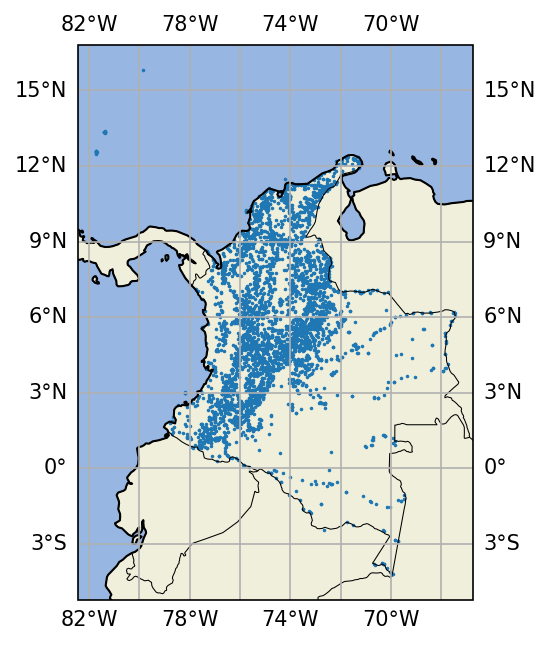

In [5]:
fig, ax = plt.subplots(subplot_kw={"projection":ccrs.PlateCarree()}, dpi=150)
ax.coastlines()
gl = ax.gridlines(draw_labels=True, crs=ccrs.PlateCarree())
ax.scatter(df_cat['longitud'], df_cat['latitud'], transform=ccrs.PlateCarree(), s=.5)
ax.add_feature(feature.LAND)
ax.add_feature(feature.OCEAN)
ax.add_feature(feature.COASTLINE, linewidth=.5)
ax.add_feature(feature.BORDERS, linewidth=.5)

podemos agrupar la data por área operativa, tipo de estacion, tecnologia, y otras variables

In [30]:
df_grp = df_cat.groupby('AREA_OPERATIVA')
# df_grp = df_cat.groupby('TECNOLOGIA')
# df_grp = df_cat.groupby('ESTADO')

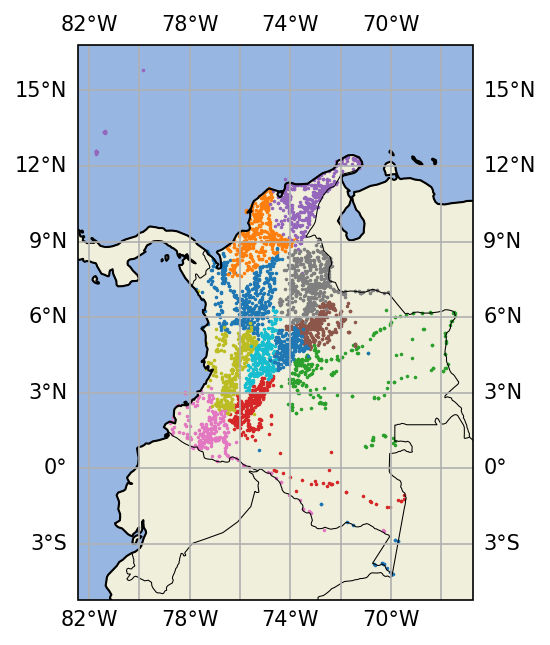

In [32]:
fig, ax = plt.subplots(subplot_kw={"projection":ccrs.PlateCarree()}, dpi=150)

for _, group in df_grp:
    ax.scatter(group['longitud'], group['latitud'], transform=ccrs.PlateCarree(), s=.5, label=_)
    
ax.coastlines()
gl = ax.gridlines(draw_labels=True, crs=ccrs.PlateCarree())
ax.add_feature(feature.LAND)
ax.add_feature(feature.OCEAN)
ax.add_feature(feature.COASTLINE, linewidth=.5)
ax.add_feature(feature.BORDERS, linewidth=.5)
# ax.legend(fontsize=5)

Podemos validar el numero total de estaciones activas, en matenimiento y suspendidas de acuerdo con la información contenida en el catálogo

In [8]:
for grp in df_grp.groups.keys():
    print(f"{grp}: {len(df_grp.get_group(grp))}")

Activa: 2202
En Mantenimiento: 429
Suspendida: 1866


También podemos hacer mapas interactivos usando [folium](https://python-visualization.github.io/folium/latest/)

In [9]:
import folium
from folium import plugins
from folium.plugins import MarkerCluster

In [10]:
min_lon, max_lon, min_lat, max_lat = -90, -72, -1, 14

map_ = folium.Map(location=[8, -76],
                  zoom_start = 6, 
                  min_lat=min_lat, 
                  max_lat=max_lat, 
                  min_lon=min_lon, 
                  max_lon=max_lon, 
                  zoom_control=False,
                  control_scale=True,
                  scrollWheelZoom=True,
                  width=1000,height=600)
marker_cluster = MarkerCluster(name="Estaciones").add_to(map_)

folium.TileLayer('cartodbpositron').add_to(map_)
folium.TileLayer('openstreetmap').add_to(map_)
folium.TileLayer('stamenterrain').add_to(map_)
folium.TileLayer('cartodbdark_matter').add_to(map_)
folium.LayerControl().add_to(map_)

minimap = plugins.MiniMap()
_ = map_.add_child(minimap)
# _

Ahora agregamos las estaciones usando la siguiente función

In [11]:
def plot_station(row):
    '''input: series that contains a numeric named latitude and a numeric named longitude
    this function creates a CircleMarker and adds it to your this_map'''
    folium.Marker(location=[row.latitud, row.longitud], popup=row["CODIGO"]).add_to(marker_cluster)

In [12]:
df_cat.apply(plot_station, axis=1)
map_

## Acceso a la informacion historica de IDEAM usando [datosabiertos.gov.co](https://www.datos.gov.co/)

la información historica de multiples sensores se puede consultar atraves de la plataforma de datos abiertos usando el aplicativo [sodapy](https://dev.socrata.com/). Socrata utiliza un módulo denominado `Socrata` que permite realizar consultas al repositorio. Cada variable hidrometeorógica dispuesta se puede consultar usando el su respectivo código de repositorio
| Variable | Código de repositorio |
| --- | --- |
| [Dirección del viento](https://www.datos.gov.co/Ambiente-y-Desarrollo-Sostenible/Direcci-n-Viento/kiw7-v9ta) | kiw7-v9ta |
| [Nivel instantaneo](https://www.datos.gov.co/Ambiente-y-Desarrollo-Sostenible/Nivel-Instant-neo/bdmn-sqnh) | bdmn-sqnh |
| [Temperatura Minima del Aire](https://www.datos.gov.co/Ambiente-y-Desarrollo-Sostenible/Temperatura-M-nima-del-Aire/afdg-3zpb) | afdg-3zpb |
| [Temperatura Maxima del Aire](https://www.datos.gov.co/Ambiente-y-Desarrollo-Sostenible/Temperatura-M-xima-del-Aire/ccvq-rp9s) | ccvq-rp9s |
| [Velocidad del Viento](https://www.datos.gov.co/Ambiente-y-Desarrollo-Sostenible/Velocidad-Viento/sgfv-3yp8) | sgfv-3yp8 |
| [Nivel Maximo](https://www.datos.gov.co/Ambiente-y-Desarrollo-Sostenible/Nivel-M-ximo/vfth-yucv) | vfth-yucv |
| [Nivel Minimo](https://www.datos.gov.co/Ambiente-y-Desarrollo-Sostenible/Nivel-M-nimo/pt9a-aamx) | pt9a-aamx |
| [Humedad del Aire](https://www.datos.gov.co/Ambiente-y-Desarrollo-Sostenible/Humedad-del-Aire-2-metros/uext-mhny) | uext-mhny |
| [Temperatura](https://www.datos.gov.co/Ambiente-y-Desarrollo-Sostenible/Datos-Hidrometeorol-gicos-Crudos-Red-de-Estaciones/sbwg-7ju4) | sbwg-7ju4 |
| [Nivel del mar mínimo](https://www.datos.gov.co/Ambiente-y-Desarrollo-Sostenible/Nivel-del-Mar-M-nimo/7z6g-yx9q) | 7z6g-yx9q |
| [Nivel del mar máximo](https://www.datos.gov.co/Ambiente-y-Desarrollo-Sostenible/Nivel-del-Mar-M-ximo/uxy3-jchf) | uxy3-jchf |
| [Nivel del mar](https://www.datos.gov.co/Ambiente-y-Desarrollo-Sostenible/Nivel-del-Mar/ia8x-22em) | ia8x-22em |
| [Presión Atmosferica](https://www.datos.gov.co/Ambiente-y-Desarrollo-Sostenible/Presi-n-Atmosf-rica/62tk-nxj5) | 62tk-nxj5 |
| [Precipitación](https://www.datos.gov.co/Ambiente-y-Desarrollo-Sostenible/Precipitaci-n/s54a-sgyg) | s54a-sgyg |

In [13]:
# importamos la libreria Socrata
from sodapy import Socrata

### Precipitación (s54a-sgyg)

Vamos a consultar los datos de `precipitación` reportada en la página. por ende vamos a usar el código `s54a-sgyg`. Para esto usamos el metodo `Socrata`, pasamos la direccion del repositorio y `None` que corresponde a la no autenticación

In [14]:
# conexión cliente usando socrata al repositorio de datos abiertos
client = Socrata("www.datos.gov.co", None)

Una vez creado el cliente empezamos a hacer la consulta de datos  usando `client.get` y pasando los respectivos parámetros `dataset_identifier`, de la tabla anterior , y `limit` para generar consultas no muy grandes para efectos demostrativos. El resultado es una lista con multiples diccionarios como se puede ver a continuación.

In [15]:
# Solicitud de informacion al repositorio de interés
results = client.get(dataset_identifier="s54a-sgyg", limit=2000)
results[:1]

[{'codigoestacion': '0023087210',
  'codigosensor': '0240',
  'fechaobservacion': '2019-08-30T17:00:00.000',
  'valorobservado': '0',
  'nombreestacion': 'CANTERAS - AUT',
  'departamento': 'ANTIOQUIA',
  'municipio': 'PUERTO NARE',
  'zonahidrografica': 'MEDIO MAGDALENA',
  'latitud': '6.276083333',
  'longitud': '-74.67330556',
  'descripcionsensor': 'Precipitacion',
  'unidadmedida': 'mm'}]

Estos resultados los podemos convertir en un `Dataframe` usando [pandas.Dataframe.from_records](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.from_records.html)

In [16]:
results_df = pd.DataFrame.from_records(results)
results_df.head()

codigoestacion codigosensor         fechaobservacion valorobservado  \
0     0023087210         0240  2019-08-30T17:00:00.000              0   
1     0015065501         0240  2019-09-03T03:50:00.000              0   
2     2302500037         0240  2019-09-02T12:50:00.000              0   
3     3503500062         0240  2019-09-12T02:10:00.000              0   
4     0025020440         0240  2019-09-08T03:40:00.000              0   

                       nombreestacion departamento    municipio  \
0                      CANTERAS - AUT    ANTIOQUIA  PUERTO NARE   
1             LA MINA CERREJON  - AUT   LA GUAJIRA      ALBANIA   
2                        BRASIL - AUT       CALDAS    MARULANDA   
3                   EL CALVARIO - AUT         META  EL CALVARIO   
4  SAN PEDRO - LA MOJANA TX GPRS/GOES        SUCRE    SAN PEDRO   

                   zonahidrografica      latitud       longitud  \
0                   MEDIO MAGDALENA  6.276083333   -74.67330556   
1                  CARIBE - GUAJIRA  11.13758333   -72.61594444   
2                   MEDIO MAGDALENA  5.139916667  -75.316638889   
3                              META  4.350355556  -73.711511111   
4  BAJO MAGDALENA- CAUCA -SAN JORGE        9.402        -75.016   

  descripcionsensor unidadmedida  
0     Precipitacion           mm  
1     Precipitacion           mm  
2     Precipitacion           mm  
3     Precipitacion           mm  
4     Precipitacion           mm

Ahora podemos usar filtrar los datos por diferentes campos como el `codigoestacion`, `fechaobservacion`, o `valorobservado`. Podemos pasar parametros `SQL` como `where`, `AND`, `IN`, entre otros, en el método `client.get`

In [17]:
# client.get?

In [29]:
# Solicitud de informacion para la estación de la Universidad Nacional - Bogotá - 0021205012
ppt_query = client.get(dataset_identifier="s54a-sgyg", 
                       select="fechaobservacion, valorobservado, codigoestacion", 
                       where="codigoestacion IN ('0021205012') \
                              AND fechaobservacion > '2017'")
df_est = pd.DataFrame.from_records(ppt_query)
df_est.head()

fechaobservacion valorobservado codigoestacion
0  2017-06-15T01:00:00.000              0     0021205012
1  2018-07-04T13:20:00.000              0     0021205012
2  2019-08-16T05:50:00.000              0     0021205012
3  2017-01-13T11:30:00.000              0     0021205012
4  2017-08-31T14:40:00.000              0     0021205012

#### Gráfico de la serie temporal 
Podemos generar una serie temporal usando la información resultado de la consulta. Sin embargo, primero debemos revisar el tipo de dato resulta

In [19]:
df_est.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   fechaobservacion  1000 non-null   object
 1   valorobservado    1000 non-null   object
 2   codigoestacion    1000 non-null   object
dtypes: object(3)
memory usage: 23.6+ KB


In [23]:
df_est.index = pd.to_datetime(df_est['fechaobservacion'])
df_est.valorobservado = df_est['valorobservado'].astype(float)
df_est = df_est.sort_index()
df_est.tail()

fechaobservacion  valorobservado codigoestacion
fechaobservacion                                                           
2019-08-24 08:50:00  2019-08-24T08:50:00.000             0.0     0021205012
2019-08-26 11:30:00  2019-08-26T11:30:00.000             0.0     0021205012
2019-08-26 14:00:00  2019-08-26T14:00:00.000             0.0     0021205012
2019-08-27 16:00:00  2019-08-27T16:00:00.000             0.0     0021205012
2019-08-27 19:20:00  2019-08-27T19:20:00.000             0.0     0021205012

TypeError: no numeric data to plot

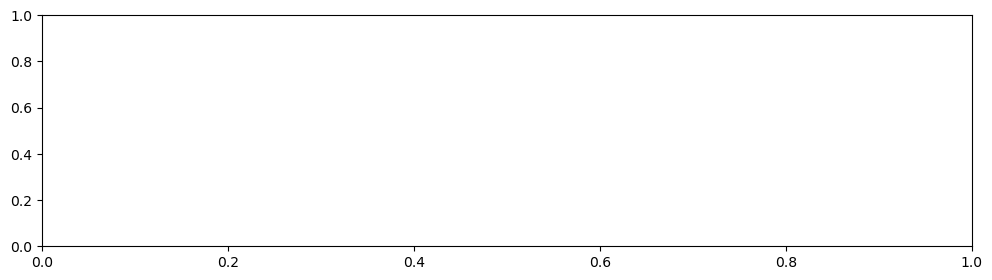

In [45]:
# pd.options.plotting.backend = 'holoviews'
fig, ax = plt.subplots(figsize=(12, 3))
df_est['valorobservado'].plot(ax=ax)

### Temperatura (sbwg-7ju4)

De manera similar podemos consultar otros registros como los de temperatura. Cambiamos el identificador de set de datos y generamos una nueva consulta

In [28]:
# Solicitud de informacion para la estación de la Universidad Nacional - Bogotá - 0021205012
temp_query = client.get(dataset_identifier="sbwg-7ju4", 
                       select="fechaobservacion, valorobservado, codigoestacion", 
                       where="codigoestacion IN ('0021205012') \
                              AND fechaobservacion > '2017'")
df_temp = pd.DataFrame.from_records(temp_query)
df_temp.index = pd.to_datetime(df_temp['fechaobservacion'])
df_temp.valorobservado = df_temp['valorobservado'].astype(float)
df_temp = df_temp.sort_index()
df_temp.tail()

fechaobservacion  valorobservado codigoestacion
fechaobservacion                                                           
2020-01-22 08:00:00  2020-01-22T08:00:00.000            13.6     0021205012
2020-01-22 10:00:00  2020-01-22T10:00:00.000            18.1     0021205012
2020-01-22 12:00:00  2020-01-22T12:00:00.000            17.6     0021205012
2020-01-22 16:00:00  2020-01-22T16:00:00.000            17.7     0021205012
2020-01-22 21:00:00  2020-01-22T21:00:00.000            13.8     0021205012

<Axes: xlabel='fechaobservacion'>

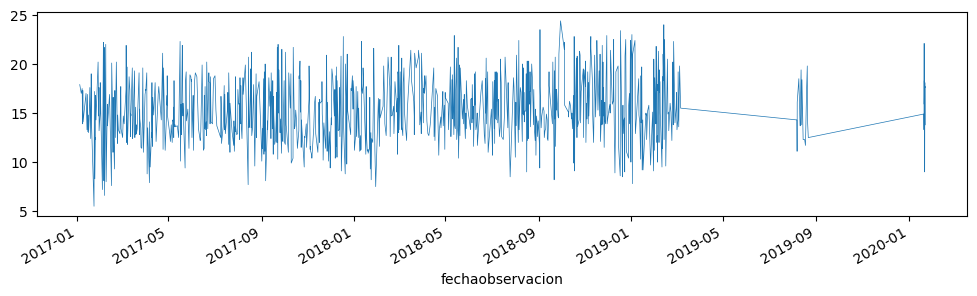

In [44]:
fig, ax = plt.subplots(figsize=(12, 3))
df_temp['valorobservado'].plot(c='C00', lw=0.5, ax=ax)

---

## Summary
Add one final `---` marking the end of your body of content, and then conclude with a brief single paragraph summarizing at a high level the key pieces that were learned and how they tied to your objectives. Look to reiterate what the most important takeaways were.

### What's next?
Let Jupyter book tie this to the next (sequential) piece of content that people could move on to down below and in the sidebar. However, if this page uniquely enables your reader to tackle other nonsequential concepts throughout this book, or even external content, link to it here!

## Resources and references
Finally, be rigorous in your citations and references as necessary. Give credit where credit is due. Also, feel free to link to relevant external material, further reading, documentation, etc. Then you're done! Give yourself a quick review, a high five, and send us a pull request. A few final notes:
 - `Kernel > Restart Kernel and Run All Cells...` to confirm that your notebook will cleanly run from start to finish
 - `Kernel > Restart Kernel and Clear All Outputs...` before committing your notebook, our machines will do the heavy lifting
 - Take credit! Provide author contact information if you'd like; if so, consider adding information here at the bottom of your notebook
 - Give credit! Attribute appropriate authorship for referenced code, information, images, etc.
 - Only include what you're legally allowed: **no copyright infringement or plagiarism**
 
Thank you for your contribution!